In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [42]:
df = pd.read_csv('E:/DQLab/Dataset/data_retail.csv', sep=';')
# Menampilkan semua kolom tanpa terpotong
pd.options.display.width = None
# Menampilkan kolom dari index ke-2 sampai akhir
print(df.iloc[:, 2:].head())
print("Informasi data:\n", df.info(memory_usage=False))

   Customer_ID Product  First_Transaction  Last_Transaction  \
0        29531   Jaket      1466304274396     1538718482608   
1        29531  Sepatu      1406077331494     1545735761270   
2       141526     Tas      1493349147000     1548322802000   
3       141526   Jaket      1493362372547     1547643603911   
4        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     10

In [43]:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction'] / 1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction'] / 1000, unit='s', origin='1970-01-01')

In [44]:
# [1] Pengecekan transaksi terakhir dalam dataset
print("\n[1] Transaksi terakhir\n", max(df['Last_Transaction']))


[1] Transaksi terakhir
 2019-02-01 23:57:57.286000013


In [45]:
# [2] Klasifikasi customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

In [46]:
# [3] Hapus kolom yang tidak diperlukan
del df['no']
del df['Row_Num']
print("\n[3] Setelah drop kolom\n", df.head())


[3] Setelah drop kolom
    Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.395999908   
1        29531  Sepatu 2014-07-23 01:02:11.493999958   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999931   
4        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  


In [47]:
# [4] Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# [5] Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

In [48]:
df_year_viz = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()

Year_First_Transaction
2013     1007
2014     4954
2015    11235
2016    17656
2017    31828
2018    30327
2019     2993
Name: Customer_ID, dtype: int64


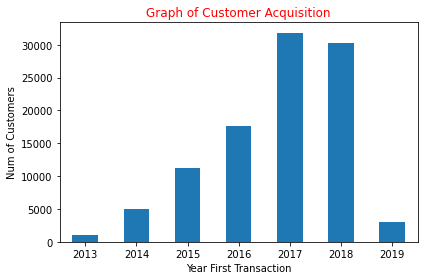

In [51]:
print(df_year_viz)
df_year_viz.plot(kind='bar')
plt.title('Graph of Customer Acquisition', color='red')
plt.xlabel('Year First Transaction')
plt.ylabel('Num of Customers')
plt.xticks(rotation=0, size=10)
plt.tight_layout()
plt.show()

Year_First_Transaction
2013     23154
2014    165494
2015    297445
2016    278707
2017    299199
2018     99989
2019      5862
Name: Count_Transaction, dtype: int64


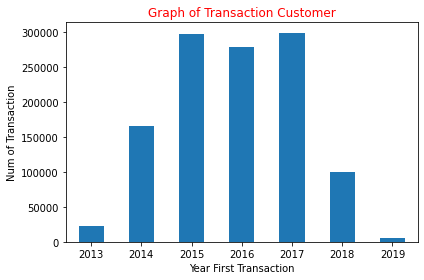

In [24]:
# [6] Transaction by Year
df_year_count = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
print(df_year_count)
# Visualisasi
df_year_count.plot(kind='bar')
plt.title('Graph of Transaction Customer', color='red')
plt.xlabel('Year First Transaction')
plt.ylabel('Num of Transaction')
plt.xticks(rotation=0, size=10)
plt.tight_layout()
plt.show()

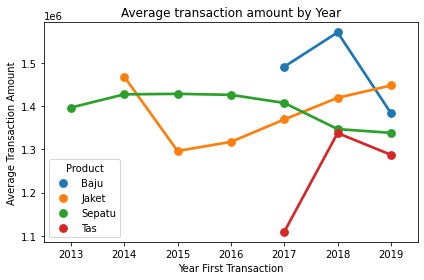

In [25]:
sns.pointplot(data=df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), x='Year_First_Transaction',
              y='Average_Transaction_Amount', hue='Product')
plt.title('Average transaction amount by Year')
plt.xlabel('Year First Transaction')
plt.ylabel('Average Transaction Amount')
plt.tight_layout()
plt.show()



[8] Proportion Churn by Product :
 Product   Baju  Jaket  Sepatu   Tas
is_churn                           
False     1268  11123   16064  4976
True      2144  23827   33090  7508

[9] Plot column: Index(['Baju', 'Jaket', 'Sepatu', 'Tas'], dtype='object', name='Product')


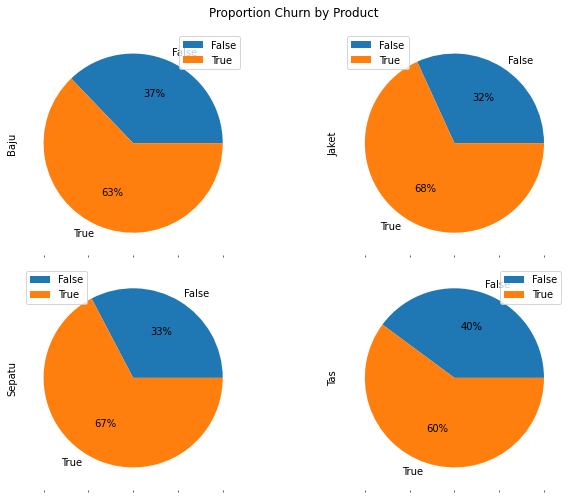

In [26]:
# [8] Melakukan pivot data dengan pivot_table
df_viz = df.pivot_table(index='is_churn', columns='Product', values='Customer_ID', aggfunc='count', fill_value=0)
print("\n[8] Proportion Churn by Product :\n", df_viz)
# Mendapatkan Proportion Churn by Product
plot_product_column = df_viz.count().sort_values().head().index
print("\n[9] Plot column:", plot_product_column)
# Plot pie chart
df_viz = df_viz.reindex(columns=plot_product_column)
df_viz.plot.pie(subplots=True, figsize=(10, 7), layout=(-1, 2), autopct='%1.0f%%', title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

In [27]:
# [9] Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif row['Count_Transaction'] >= 2 and row['Count_Transaction'] <= 3:
        val = '2. 2-3'
    elif row['Count_Transaction'] >= 4 and row['Count_Transaction'] <= 6:
        val = '3. 4-6'
    elif row['Count_Transaction'] >= 7 and row['Count_Transaction'] <= 10:
        val = '4. 7-10'
    else:
        val = '5. >10'
    return val


[9] Count Transaction Group :
 Count_Transaction_Group
1. 1       49255
2. 2-3     14272
3. 4-6     12126
4. 7-10     2890
5. >10     21457
Name: Customer_ID, dtype: int64


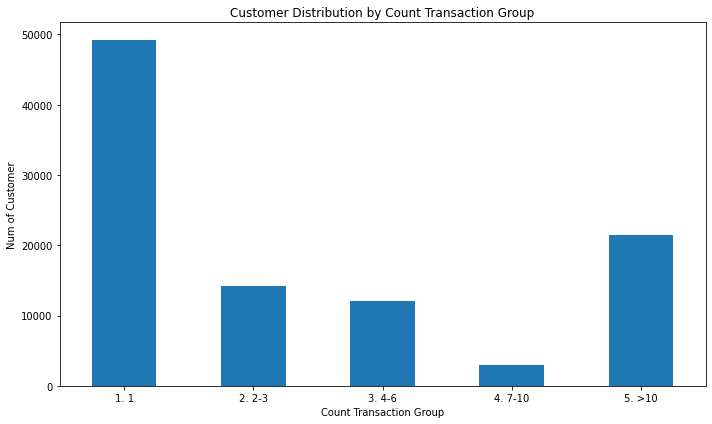

In [55]:
df['Count_Transaction_Group'] = df.apply(func, axis=1)
count_trans_group = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
print("\n[9] Count Transaction Group :\n", count_trans_group)
# Visualisasi Count_Transaction_Group
plt.figure(figsize=(10, 6))
count_trans_group.plot(kind='bar')
plt.title('Customer Distribution by Count Transaction Group')
plt.xlabel('Count Transaction Group')
plt.ylabel('Num of Customer')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
# [10] Distribusi Kategorisasi Average_Transaction_Amount
def f(row):
    if row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 250000:
        val = '1. 100.000 - 250.000'
    elif row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000:
        val = '2.>250.000 - 500.000'
    elif row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000:
        val = '3.>500.000 - 750.000'
    elif row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000:
        val = '4.>750.000 - 1.000.000'
    elif row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000:
        val = '5.>1.000.000 - 2.500.000'
    elif row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000:
        val = '6.>2.500.000 - 5.000.000'
    elif row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000:
        val = '7.>5.000.000 - 10.000.000'
    else:
        val = '8.>10.000.000'
    return val

[10] Average Transaction Group
 Average_Transaction_Amount_Group
1. 100.000 - 250.000          7944
2.>250.000 - 500.000         18857
3.>500.000 - 750.000         15171
4.>750.000 - 1.000.000       12298
5.>1.000.000 - 2.500.000     32819
6.>2.500.000 - 5.000.000      9027
7.>5.000.000 - 10.000.000     3689
8.>10.000.000                  195
Name: Customer_ID, dtype: int64


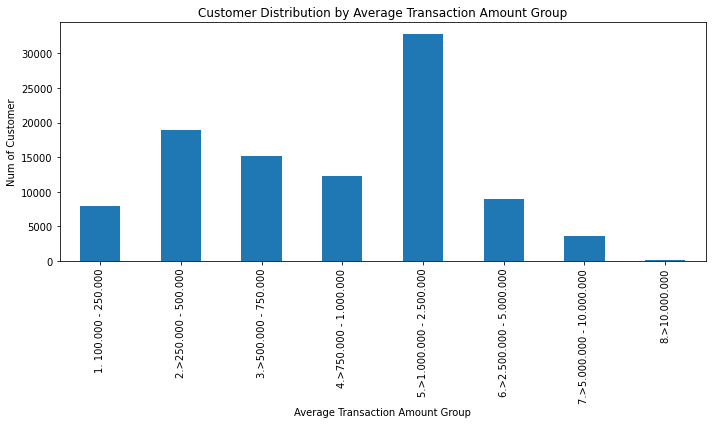

In [59]:
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)
avg_trans_group = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
print("[10] Average Transaction Group\n", avg_trans_group)
plt.figure(figsize=(10, 6))
avg_trans_group.plot(kind='bar')
plt.title('Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average Transaction Amount Group')
plt.ylabel('Num of Customer')
# labels, location = plt.xticks()
# plt.xticks(labels, (labels / 10))
plt.tight_layout()
plt.show()